# **Exploring the Connection Between the Location of Fast Food Outlets and Mortality**

This project will explore the association between geographic locations of fast food outlets and it's impact on mortality rates and types of mortality in the United States. 

1. Introduction
2. The Data
3. Getting Started
4. Data Inspection and Cleaning
5. Data Analysis
6. Final Thoughts and Comments
7. References

##   **1. Introduction**

In the 1950s, the United States was recognised as one of the top 10 nations for life expectancy, however by 2040, the American life expectancy has been anticipated to decline to the 64th position (Butcher, 2020). 

Although the interest in health and wellness continues to grow in the United States, the upward trajectory of obesity rates has also increased (USAFacts, 2023). With obesity, smoking and alcohol being the key causes of preventable deaths in the United States (Chamie, 2021), it is clear that unhealthy lifestyles play a pivotal role in contributing to mortality in the United States. 

Whilst fast food outlets provide a convenient and affordable solution for individuals to satisfy their mealtime needs, the significant levels of saturated fats, sugars, and sodium inherent in these meals are strongly linked to patterns of unhealthy living.

In order to explore this further, this project seeks to investigate whether a relationship exists between the geographical presence of fast food restaurants and mortality trends in the United States.

This project focuses on an analysis limited to the state level within the United States.

We will look into the following 6 questions to explore the potential trends between fast food locations and mortality in the US:


*   **A.**  What are the five most prevalent causes of mortality in the United States?

*   **B.**  Which states exhibit the highest mortality rates within each of these five categories?

*   **C.**  Which state has the most fast food restaurants per capita or per 100,000 people (whatever is most fit for analysis purposes)?  

*   **D.1**  Is there a relationship between number of fast food restaurants and deaths for each of the top 5 mortality types? 

*   **D.2** Which mortality type has the strongest correlation with fast food locations?

*   **E.**  Does the state with the highest mortality rate in the mortality type from Question D.2 also have the highest number of fast food restaurants per capita/100,000 people?

*   **F.**  What are the trends over time for the mortality type discovered in question 5D.2. Why is this the case?



## **2. The Data**

This project uses 3 datasets which are publicly available on Kaggle.

**Mortality.csv**

This dataset explores mortality rates in the United States from 1980-2014. All numbers reflect deaths per 100,000 population in the US. The dataset includes data on 21 different mortality types in the US. Although more recent data would have been preferred, this project will primarily focus on data from 2014 as it is the most recent data that could be found.

Link to dataset: https://www.kaggle.com/datasets/IHME/us-countylevel-mortality

Main data columns are:
*   State
*   Category
*   2014 Mortality Rate
*   1980 Mortality Rate
*   Change

**FastFoodRestaurants.csv**

This dataset provides information on fast food franchises located across the various states in America. It provides information on over 10,000 different fast food restaurants across the country. This dataset was created in 2019.

Link to dataset: https://www.kaggle.com/datasets/rishidamarla/fast-food-restaurants-in-america

Main data columns are:
*   State
*   Name
*   Latitude
*   Longitude


**USPopulation.csv**

This dataset provides the US population per state from the 2020 Census data. It has been used to calculate per capita data throughout this project.

Link to dataset: https://www.kaggle.com/datasets/alexandrepetit881234/us-population-by-state

Main columns are:
*   State
*   Population


##  **3. Getting Started**

In our project, we will be leveraging a range of python libraries to support with data visualisation, data organisation and statistical analysis. We have imported Pandas, Matplotlib, NumPy, SciPy and Plotly below which will be used throughout the project.

We have also imported the 3 datasets into our project below.

In [1]:
#import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import plotly.express as px

#import the datasets
fastfood_df = pd.read_csv("FastFoodRestaurants.csv")
population_df = pd.read_csv("USPopulation.csv")
mortality_df = pd.read_csv("Mortality.csv")


## **4. Data Inspection and Cleaning**

It is important to clean the data so that our data is of high quality and that analysis can be performed efficiently and productively.

### *Check for Duplicates*
There are no duplicates so there is no need for further action here.

In [2]:
print(mortality_df[mortality_df.duplicated()==True])
print(fastfood_df[fastfood_df.duplicated()==True])
print(population_df[population_df.duplicated()==True])

Empty DataFrame
Columns: [Location, FIPS, Category, Mortality Rate, 1980*, Mortality Rate, 1980* (Min), Mortality Rate, 1980* (Max), Mortality Rate, 1985*, Mortality Rate, 1985* (Min), Mortality Rate, 1985* (Max), Mortality Rate, 1990*, Mortality Rate, 1990* (Min), Mortality Rate, 1990* (Max), Mortality Rate, 1995*, Mortality Rate, 1995* (Min), Mortality Rate, 1995* (Max), Mortality Rate, 2000*, Mortality Rate, 2000* (Min), Mortality Rate, 2000* (Max), Mortality Rate, 2005*, Mortality Rate, 2005* (Min), Mortality Rate, 2005* (Max), Mortality Rate, 2010*, Mortality Rate, 2010* (Min), Mortality Rate, 2010* (Max), Mortality Rate, 2014*, Mortality Rate, 2014* (Min), Mortality Rate, 2014* (Max), % Change in Mortality Rate, 1980-2014, % Change in Mortality Rate, 1980-2014 (Min), % Change in Mortality Rate, 1980-2014 (Max)]
Index: []

[0 rows x 30 columns]
Empty DataFrame
Columns: [address, city, country, keys, latitude, longitude, name, postalCode, province, websites]
Index: []
Empty DataFra

###   *Check for Nulls*


The mortality_df dataframe returns many nulls.

In [3]:
print(mortality_df[mortality_df.isna().any(axis=1)])

            Location  FIPS                                           Category  \
0      United States   NaN                                 Neonatal disorders   
3194   United States   NaN                          HIV/AIDS and tuberculosis   
6388   United States   NaN                          Musculoskeletal disorders   
9582   United States   NaN  Diabetes, urogenital, blood, and endocrine dis...   
12776  United States   NaN                                 Digestive diseases   
15970  United States   NaN                       Chronic respiratory diseases   
19164  United States   NaN                             Neurological disorders   
22358  United States   NaN         Cirrhosis and other chronic liver diseases   
25552  United States   NaN                 Mental and substance use disorders   
28746  United States   NaN      Forces of nature, war, and legal intervention   
31940  United States   NaN                             Unintentional injuries   
35134  United States   NaN  

This is because the 'FIPS' column in the dataset  has not been recognised by Pandas. We are not using the 'FIPS' column in our analysis so we can drop the column.

In [4]:
mortality_df = mortality_df.drop(['FIPS'], axis = 1)
print(mortality_df[mortality_df.isna().any(axis=1)])

Empty DataFrame
Columns: [Location, Category, Mortality Rate, 1980*, Mortality Rate, 1980* (Min), Mortality Rate, 1980* (Max), Mortality Rate, 1985*, Mortality Rate, 1985* (Min), Mortality Rate, 1985* (Max), Mortality Rate, 1990*, Mortality Rate, 1990* (Min), Mortality Rate, 1990* (Max), Mortality Rate, 1995*, Mortality Rate, 1995* (Min), Mortality Rate, 1995* (Max), Mortality Rate, 2000*, Mortality Rate, 2000* (Min), Mortality Rate, 2000* (Max), Mortality Rate, 2005*, Mortality Rate, 2005* (Min), Mortality Rate, 2005* (Max), Mortality Rate, 2010*, Mortality Rate, 2010* (Min), Mortality Rate, 2010* (Max), Mortality Rate, 2014*, Mortality Rate, 2014* (Min), Mortality Rate, 2014* (Max), % Change in Mortality Rate, 1980-2014, % Change in Mortality Rate, 1980-2014 (Min), % Change in Mortality Rate, 1980-2014 (Max)]
Index: []

[0 rows x 29 columns]


The population_df dataframe returns 1 row that contains a null value. 

In [5]:
print(population_df[population_df.isna().any(axis=1)])

    rank       state state_code  2020_census  percent_of_total
51   NaN  Total U.S.      Total    331449281               NaN


This row containing the NaN value shows the the entire population in the United States by summing each  State. This is not required for the purpose of our analysis as we are only focusing on individual US States. Therefore, we can drop this row from the dataset.

In [6]:
population_df = population_df.dropna()
print(population_df[population_df.isna().any(axis=1)])

Empty DataFrame
Columns: [rank, state, state_code, 2020_census, percent_of_total]
Index: []


The fastfood_df dataframe returns many nulls. 

In [7]:
print(fastfood_df[fastfood_df.isna().any(axis=1)])

                  address              city country  \
37          218 W Main St               Ada      US   
137         161 Church St        Burlington      US   
262   3596 MT Diablo Blvd         Lafayette      US   
292     309 S Pearson Rd.             Pearl      US   
303       6466 Poplar Ave           Memphis      US   
...                   ...               ...     ...   
9959      2505 W March Ln          Stockton      US   
9961       11503 S 4000 W          S Jordan      US   
9976      170 E Taylor St          San Jose      US   
9978            Us Hwy 29           Chatham      US   
9981       789 1st St S E  Saint Petersburg      US   

                                              keys   latitude   longitude  \
37                us/ok/ada/218wmainst/-1173852384  34.774820  -96.681260   
137       us/vt/burlington/161churchst/-1600724499  44.475680  -73.212640   
262   us/ca/lafayette/3596mtdiabloblvd/-1322134216  37.891487 -122.123350   
292          us/al/pearl/309spe

This is because the 'websites' column in the dataset returns URLs which has not been recognised by Pandas. We are not using the 'websites' column in our analysis so we can drop the column.

In [8]:
fastfood_df = fastfood_df.drop(['websites'], axis = 1)
print(fastfood_df[fastfood_df.isna().any(axis=1)])

Empty DataFrame
Columns: [address, city, country, keys, latitude, longitude, name, postalCode, province]
Index: []


### *Clean Columns Headings*
We will be using the State names in each dataset to merge the data. Currently each dataframe uses a different column heading for State, as below:
*   population_df - 'state'
*   mortality_df - 'Location'
*   fastfood_df - 'province'

We will rename them to 'State' for consistency.

Other column headers have also been renamed or deleted for ease of use during analysis.

In [9]:
fastfood_df = fastfood_df.rename(columns = {'address':'Address','city':'City','keys':'Keys','latitude':'Latitude','longitude':'Longitude','name':'Name','postalCode':'PostalCode','province':'State','websites':'Websites','country':'Country'})
mortality_df = mortality_df.rename(columns = {'Mortality Rate, 1980*':'1980 Mortality Rate','Mortality Rate, 1985*':'1985 Mortality Rate','Mortality Rate, 1990*':'1990 Mortality Rate','Mortality Rate, 1995*':'1995 Mortality Rate','Mortality Rate, 2000*':'2000 Mortality Rate','Mortality Rate, 2005*':'2005 Mortality Rate','Mortality Rate, 2010*':'2010 Mortality Rate','Mortality Rate, 2014*':'2014 Mortality Rate','% Change in Mortality Rate, 1980-2014':'Change','Location':'State'})
population_df = population_df.rename(columns ={'state': 'State Full', 'state_code': 'State','2020_census':'Population','percent_of_total':'Percent of Country', 'rank':'Rank'})
mortality_df.drop(columns=["Mortality Rate, 1980* (Min)", "Mortality Rate, 1980* (Max)","Mortality Rate, 1985* (Min)", "Mortality Rate, 1985* (Max)","Mortality Rate, 1990* (Min)", "Mortality Rate, 1990* (Max)","Mortality Rate, 1995* (Min)", "Mortality Rate, 1995* (Max)","Mortality Rate, 2000* (Min)", "Mortality Rate, 2000* (Max)","Mortality Rate, 2005* (Min)", "Mortality Rate, 2005* (Max)","Mortality Rate, 2010* (Min)", "Mortality Rate, 2010* (Max)","Mortality Rate, 2014* (Min)", "Mortality Rate, 2014* (Max)","% Change in Mortality Rate, 1980-2014 (Min)","% Change in Mortality Rate, 1980-2014 (Max)"])
mortality_df = mortality_df[mortality_df.State != 'United States']

### *Clean Location Names*
The mortality_df dataframe goes beyond State level analysis, into County level analysis. We were unable to find corresponding County level data for fast food locations so we will only focus on State level analysis. 

In [10]:
print(mortality_df[['State']])

                            State
1                         Alabama
2         Autauga County, Alabama
3         Baldwin County, Alabama
4         Barbour County, Alabama
5            Bibb County, Alabama
...                           ...
67069  Sweetwater County, Wyoming
67070       Teton County, Wyoming
67071       Uinta County, Wyoming
67072    Washakie County, Wyoming
67073      Weston County, Wyoming

[67053 rows x 1 columns]


Since the dataset shows both State-level and County-level mortality rates for the 21 different mortality categories, we simply need to remove all rows containing Counties. Not all County rows contain the word 'County', however all rows containing Counties contain a ',' so we have used that as the differentiating factor and removed all rows containing County names.

In [11]:
mortality_df = mortality_df[~mortality_df['State'].str.contains(',')] #reference - (flyingmeatball, 2016)
print(mortality_df[['State','Category']])

               State                                 Category
1            Alabama                       Neonatal disorders
69            Alaska                       Neonatal disorders
99           Arizona                       Neonatal disorders
115         Arkansas                       Neonatal disorders
191       California                       Neonatal disorders
...              ...                                      ...
66747       Virginia  Neglected tropical diseases and malaria
66881     Washington  Neglected tropical diseases and malaria
66921  West Virginia  Neglected tropical diseases and malaria
66977      Wisconsin  Neglected tropical diseases and malaria
67050        Wyoming  Neglected tropical diseases and malaria

[1071 rows x 2 columns]


Another issue in the data was that the States in the 3 datasets were displayed in different formats. For example, the fastfood and population dataframe used acronyms whereas the mortality dataframe used the full State name.

We need to standardise the State names in order to merge these dataframes for analysis.


In [12]:
fastfood_df['State'][:5]

0    NY
1    OH
2    KY
3    NY
4    OH
Name: State, dtype: object

In [13]:
mortality_df['State'][:5]

1         Alabama
69         Alaska
99        Arizona
115      Arkansas
191    California
Name: State, dtype: object

In [14]:
population_df['State'][:5]

0    CA
1    TX
2    FL
3    NY
4    PA
Name: State, dtype: object

We have chosen to use State acronyms rather than the full State names as we will be creating choropleth maps for the USA which require acronyms. 

In [15]:
#US State acronyms - (Boy Scouts of America, 2018)
STATES_ACRONYM = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA'
,'Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','District of Columbia': 'DC','Florida': 'FL',
'Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA','Kansas': 'KS','Kentucky': 
'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota'
: 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV',
'New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 
'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island'
: 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont'
: 'VT','Virginia': 'VA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}

#replacing State with acronyms in mortality_df
mortality_df['State'] = mortality_df['State'].replace(STATES_ACRONYM)

## **5. Data Analysis**

###   **A. What are the five most prevalent causes of mortality in the United States?**

We will show the top 5 mortality types in the United States to narrow down our analysis from 21 mortality categories. This question is interesting as it allows us to gain deeper insight into the types of mortality in the United States.

To find the most common mortality categories in the United States, we will be using numbers from the '2014 Mortality Rate' column as that reflects the most recent data available to us. The number of mortalities in this dataset is weighted to per 100,000 people in each State.

The information has been displayed in a bar chart grouped by total number of mortalities (2014 Mortality Rate) by each category.



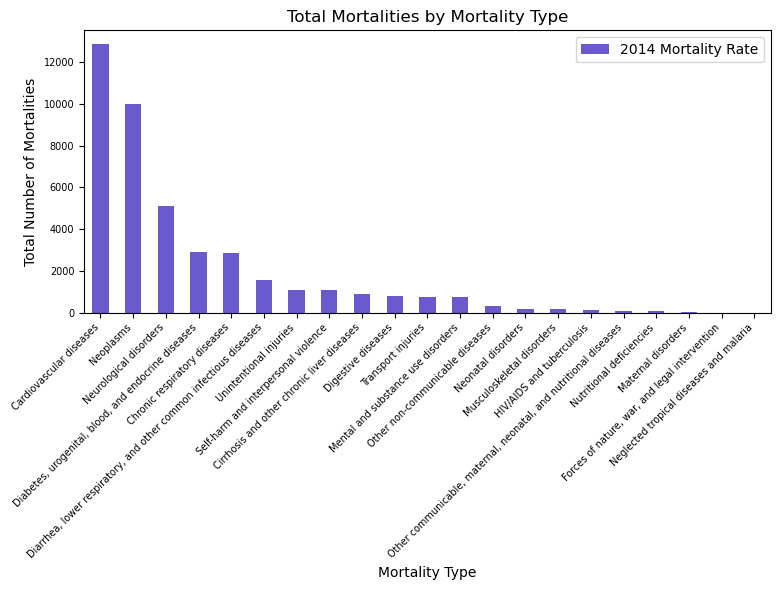

In [16]:
#grouping the data in mortality_df by category and summing the 2014 Mortality Rate
s = mortality_df.groupby('Category')['2014 Mortality Rate'].sum().reset_index()

# sorting the data in descending order of total mortalities
s.sort_values(by='2014 Mortality Rate', ascending=False, inplace=True)

# creating a bar chart
s.plot(
    kind = 'bar',
    x = 'Category',
    y = '2014 Mortality Rate',
    fontsize = 7,
    color = 'slateblue',
    xlabel = 'Mortality Type',
    ylabel = 'Total Number of Mortalities',
    title = 'Total Mortalities by Mortality Type',
    figsize = [8,6]
)

# adding labels and other aesthetic requirements
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()


**Answer**

The 5 most common mortality types in the United States are:
*   Cardiovascular diseases
*   Neoplasms
*   Neurological disorders
*   Diabetes, urogenital, blood, and endocrine diseases  
*   Chronic respiratory disease 

### **B. Which states exhibit the highest mortality rates within each of these five categories?**


We will explore which States have the highest rates of mortality in each of the 5 categories identified in the question above. The categories are - cardiovascular diseases, neoplasms, neurological disorders,diabetes, urogenital, blood, and endocrine diseases and chronic respiratory disease.

To identify the States with the highest mortality rates in each of those categories, we will create one subplot for each mortality type. We have chosen to only display the top 10 States for each category as it is more visually appealing, and we only need to identify the top State.

This question is interesting as it allows us to gather insight into the States that have the most deaths in each mortality type. This insight allows us to have a quick glance into which States commonly fall in the top 10 for each category, prompting questions around what those States are doing differently have high preventable mortalities per 100,000 people.

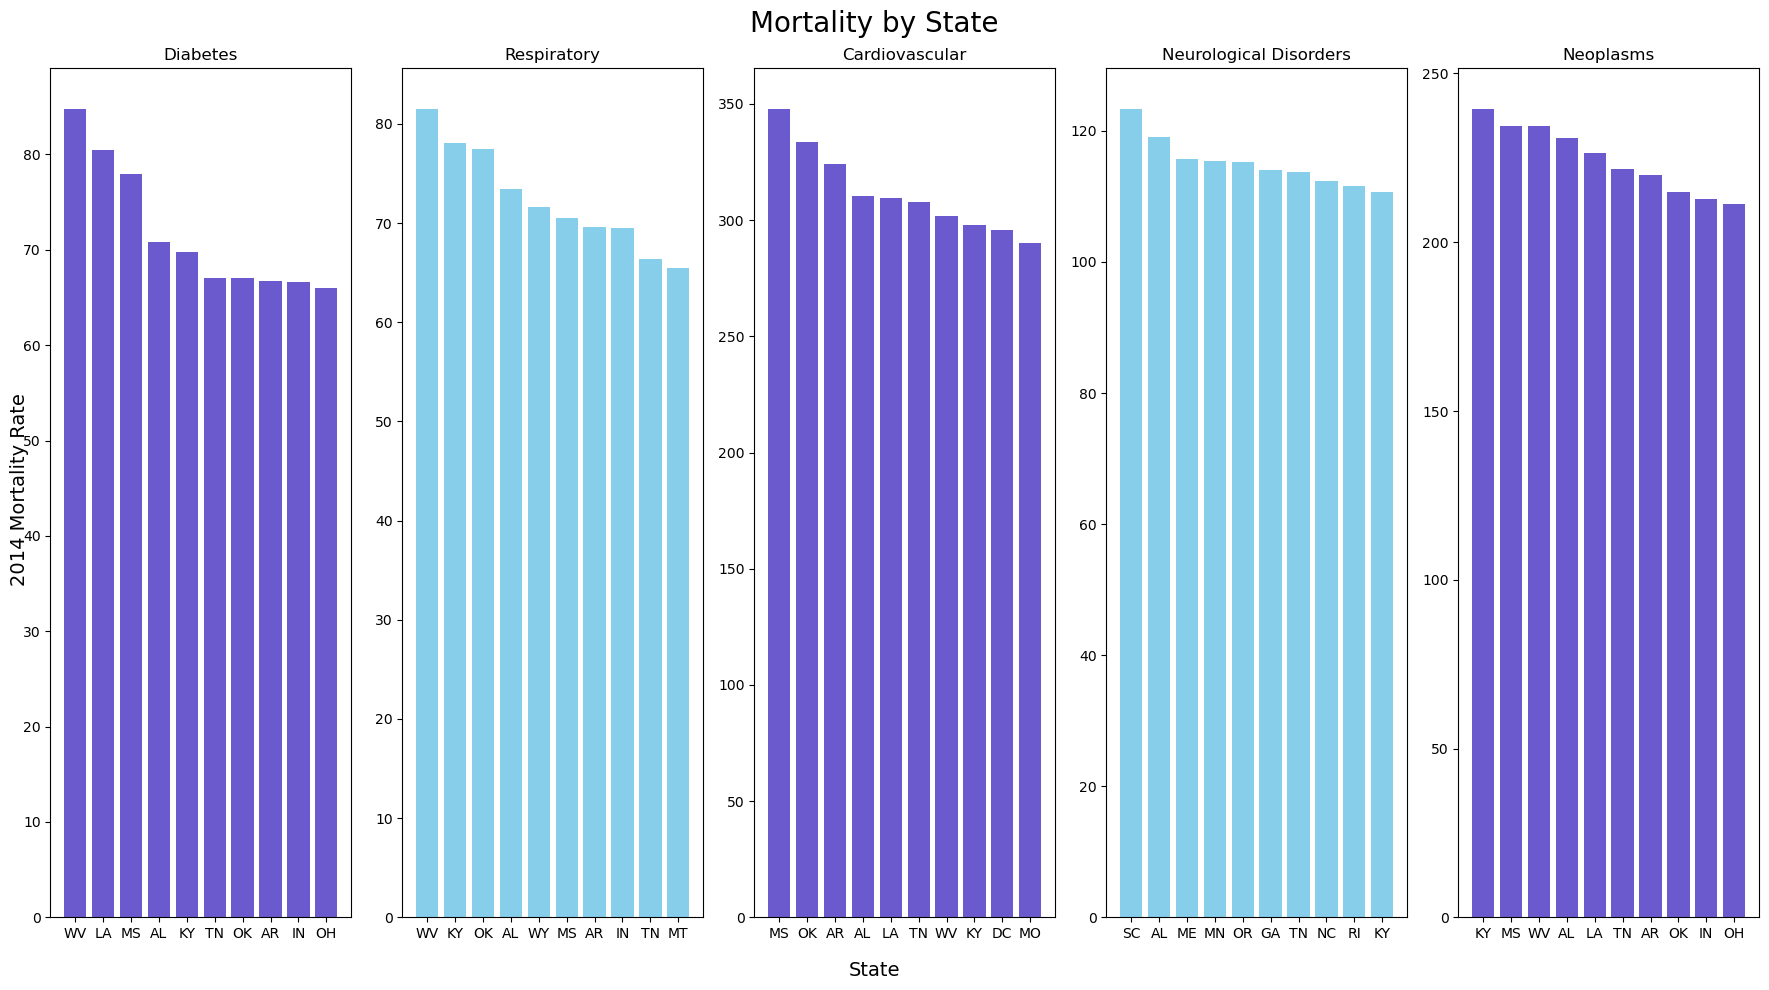

In [17]:
#create dataframes for the 5 mortality categories for easier data analysis
mortality_df.sort_values(by = '2014 Mortality Rate', ascending = False, inplace = True)
diabetes_df = mortality_df[mortality_df['Category'] == 'Diabetes, urogenital, blood, and endocrine diseases']
respiratory_df = mortality_df[mortality_df['Category'] == 'Chronic respiratory diseases']
cardiovascular_df = mortality_df[mortality_df['Category'] == 'Cardiovascular diseases']
neoplasm_df = mortality_df[mortality_df['Category'] == 'Neoplasms']
neurological_df = mortality_df[mortality_df['Category'] == 'Neurological disorders']

#creating axes for subplots
fig = plt.figure(figsize = (18,10))

ax1 = fig.add_subplot(1,5,1)
ax2 = fig.add_subplot(1,5,2)
ax3 = fig.add_subplot(1,5,3)
ax4 = fig.add_subplot(1,5,4)
ax5 = fig.add_subplot(1,5,5)

# plotting diabetes data on the first subplot
ax1.bar(diabetes_df['State'][:10], diabetes_df['2014 Mortality Rate'][:10], color = 'slateblue')
ax1.set_title('Diabetes')

# plotting chronic respiratory data on the second subplot
ax2.bar(respiratory_df['State'][:10], respiratory_df['2014 Mortality Rate'][:10],color = 'skyblue')
ax2.set_title('Respiratory')

# plotting cardiovascular data on the third subplot
ax3.bar(cardiovascular_df['State'][:10], cardiovascular_df['2014 Mortality Rate'][:10],color = 'slateblue')
ax3.set_title('Cardiovascular')

# plotting neurological data on the fourth subplot
ax4.bar(neurological_df['State'][:10], neurological_df['2014 Mortality Rate'][:10],color = 'skyblue')
ax4.set_title('Neurological Disorders')

# plotting neoplasm data on the fifth subplot
ax5.bar(neoplasm_df['State'][:10], neoplasm_df['2014 Mortality Rate'][:10],color = 'slateblue')
ax5.set_title('Neoplasms')

# Adding labels and other aesthetic changes
fig.supxlabel('State', fontsize = 14)
fig.supylabel('2014 Mortality Rate', fontsize = 14)
fig.suptitle('Mortality by State', fontsize = 20)
plt.tight_layout()
plt.show()



**Answer**

*   State with highest diabetic deaths: **WV - West Virginia**
*   State with highest respiratory deaths: **WV - West Virginia**
*   State with highest cardiovascular deaths: **MS - Mississippi**
*   State with highest neurological deaths: **SC - South Carolina**
*   State with highest neoplasm deaths: **KY - Kentucky**

### **C. Which state has the most fast food restaurants per capita or per 100,000 people (whatever is most fit for analysis purposes)?**

We will identify the State with the most fast food restaurants per 100,000 people rather than per capita due to the per capita ratio being too small, and to better align with the mortality rate data.

This question is interesting as currently the data in the dataset shows the total number of fast food restaurants in the US. Given that California and Texas have the largest population in the US, naturally they will also have the largest number of fast food restaurants.

Since a larger population will generally be associated with a higher number of restaurants, it is important to weight the data to population size  to ensure the dataset accounts for the population in each State. This provides more accurate insight into which State actually has the most fast food restaurants per population density.

To calculate per capita, we have divided the total number of restaurants in each State by the population of each State. This number was then weighted to per 100,000 people to align with the mortality rate data.

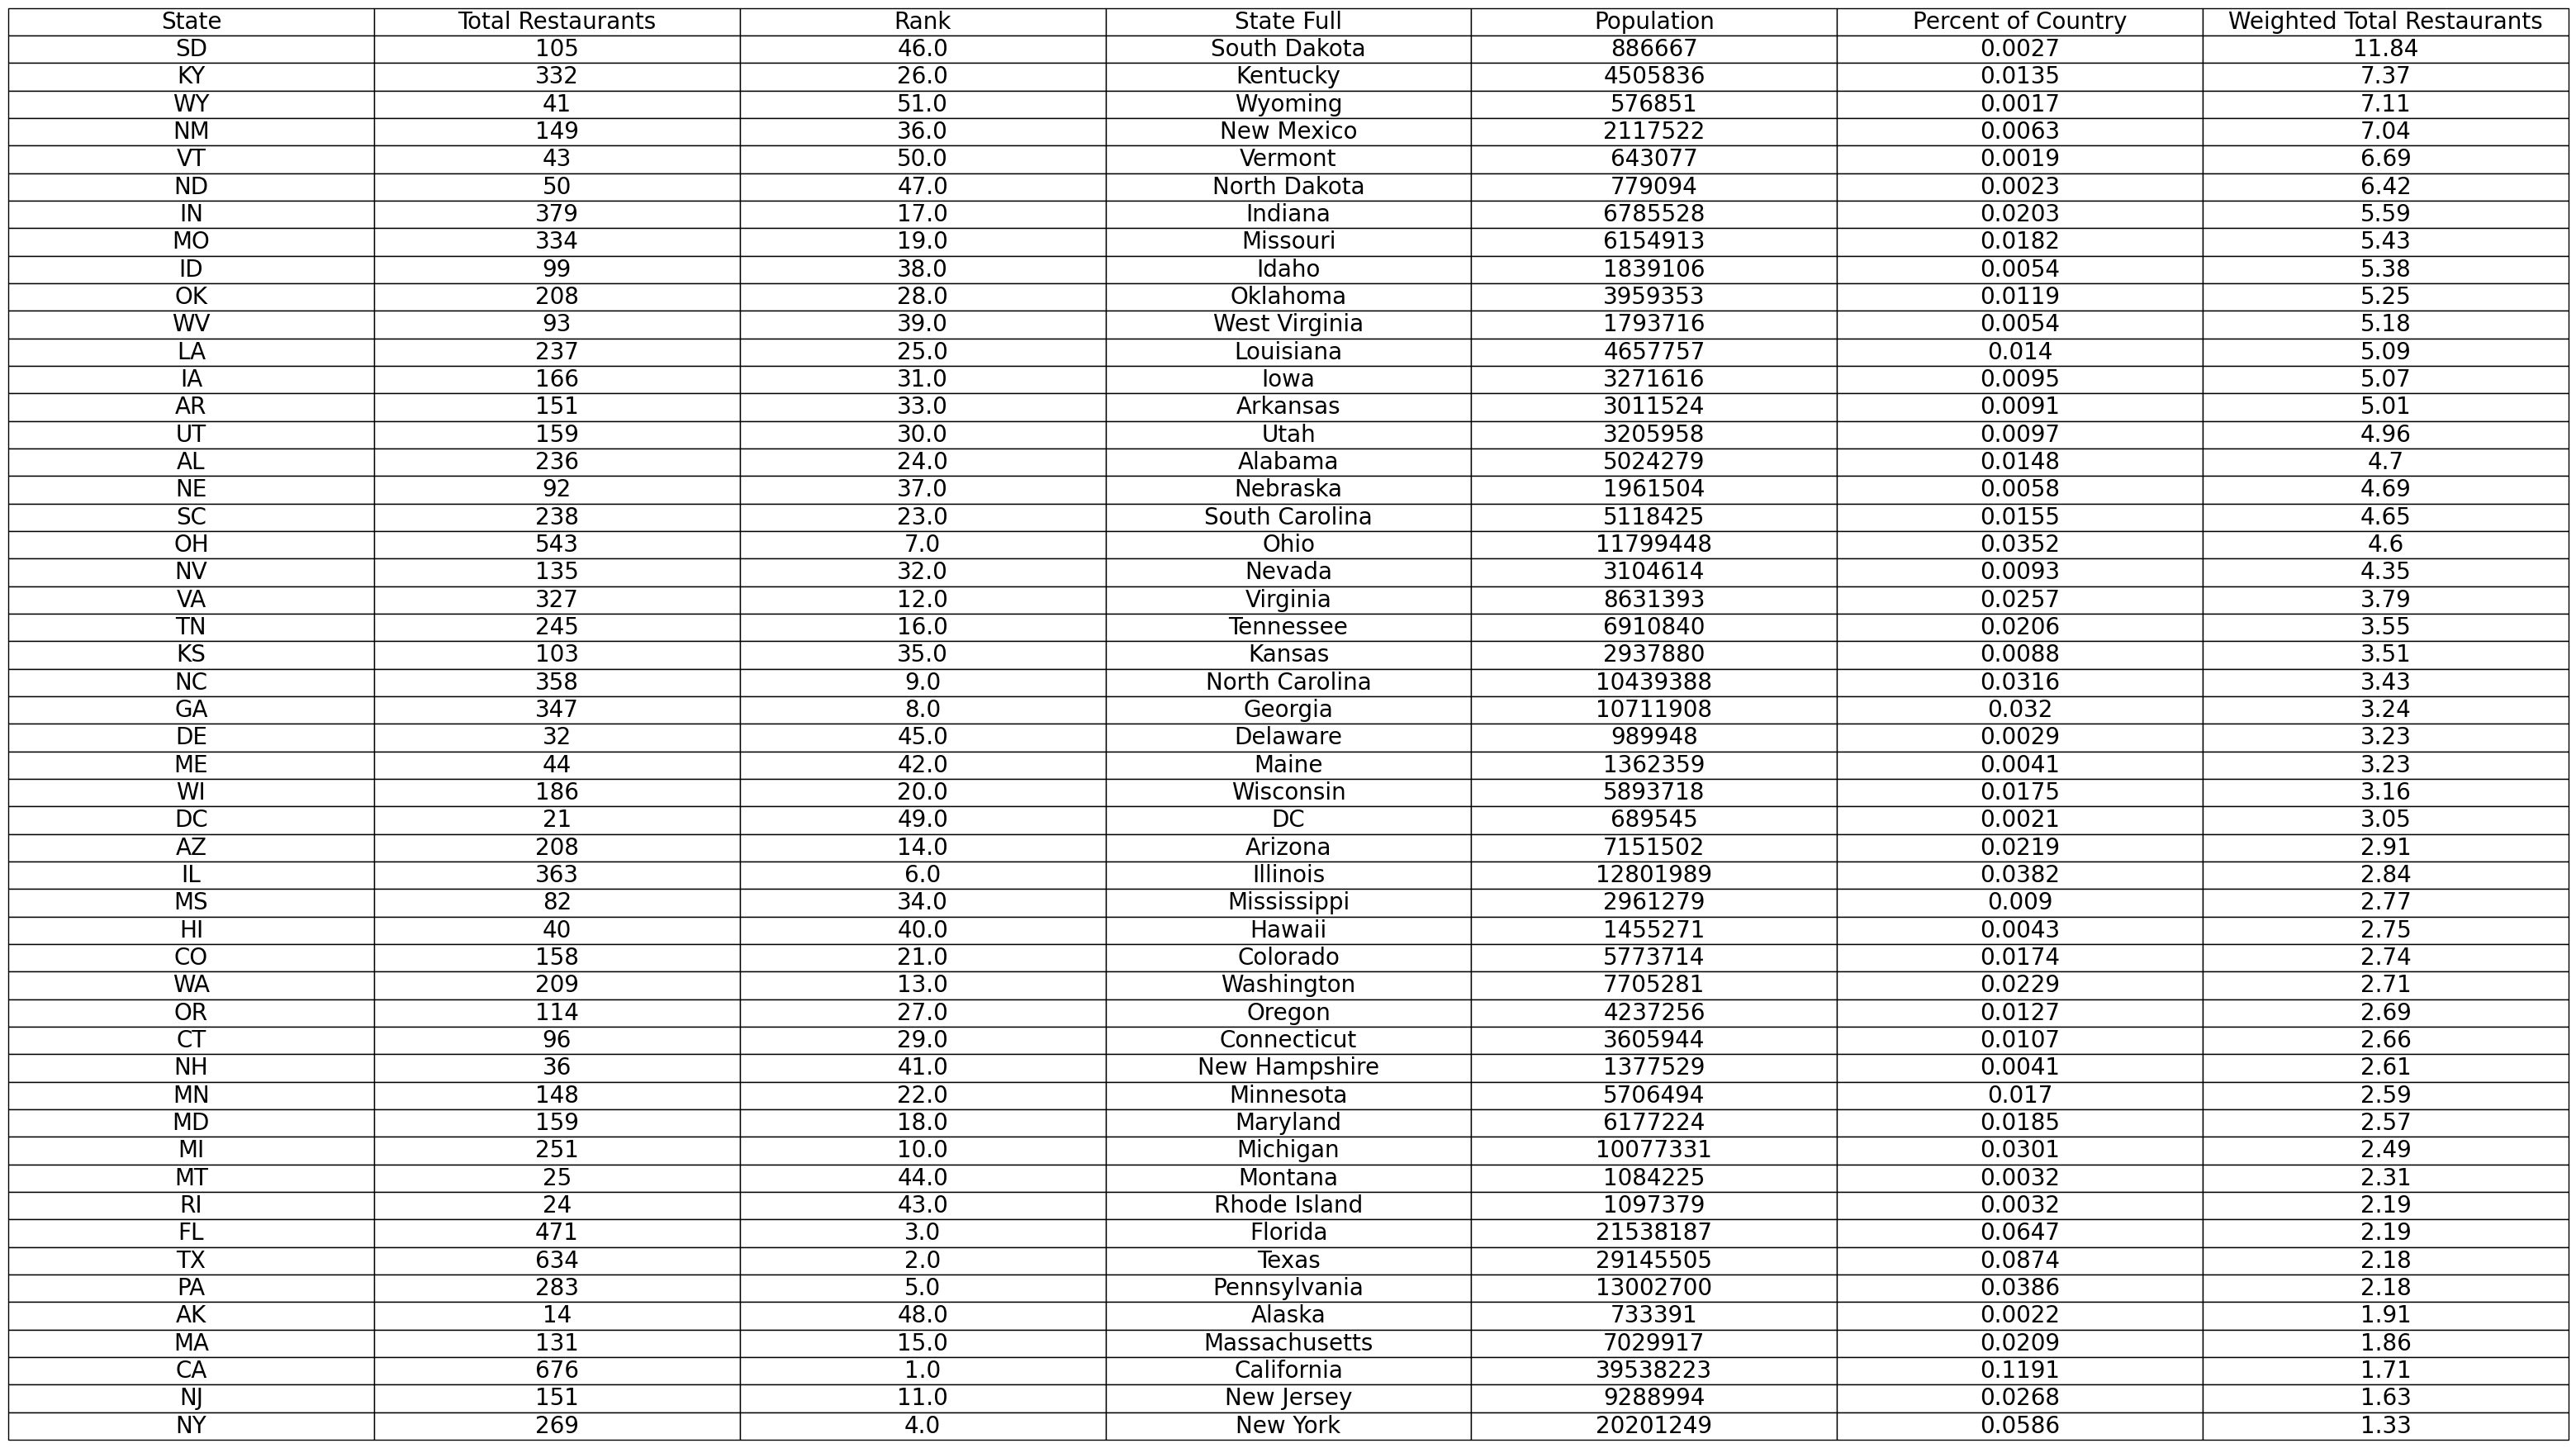

In [18]:
#counting the total restaurants available in each unique State in the fast food dataframe
state_counts = fastfood_df['State'].value_counts()
state_counts_df = pd.DataFrame({'State': state_counts.index, 'Total Restaurants': state_counts.values})

#merging the fast food dataframe with the American population dataframe so that the number of 
#restaurants can be weighted by population
state_pop_merged_df = pd.merge(state_counts_df, population_df, on='State')

#creating a new column to show number of fastfood restaurants in each state, weighted by population
state_counts_df['State'] = state_counts_df['State'].replace(STATES_ACRONYM)
state_pop_merged_df['Weighted Total Restaurants'] = (state_pop_merged_df['Total Restaurants'] / state_pop_merged_df['Population'])*100000
state_pop_merged_df['Weighted Total Restaurants']  = state_pop_merged_df['Weighted Total Restaurants'].astype(float).round(2)
state_pop_merged_df = state_pop_merged_df.sort_values(by='Weighted Total Restaurants',ascending=[False])

# plotting the table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')  # turning off axis for the subplot

# converting the DataFrame to a list of lists for the table
table_data = [state_pop_merged_df.columns] + state_pop_merged_df.values.tolist()

#modifying table layout
table = ax.table(cellText=table_data, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(20)
table.scale(4, 2)

plt.show()

**Answer**

From the table above, we can see that South Dakota has the most fast food restaurants per 100,000 individuals, coming in at 11.84 restaurants. 

On the other hand, New York has the least amount of fast food restaurants, with a total of 1.33 per 100,000 people.

### **D.1 Is there a relationship between number of fast food restaurants and deaths for each of the top 5 mortality types?**

We will now look at the relationship between the geographic location of fast food restaurants and it's impact on each of the 5 mortality types identified earlier. 

Earlier we had looked into the most common mortality types, States with highest mortalities, and States with the most fast food restaurants weighted to population size. This question allows us to explore whether there is a correlation between the above factors. 

A scatter plot is used to identify if there is any correlation between mortality rate and number of fast food restaurants. We have also calculated the correlation coeffient to provide a numeric value to each relationship.

We will be using the following scale for our correlation coefficients (LaMorte, 2021):
*   0.8-1.0 Very Strong Positive
*   0.6-0.79 Strong Positive
*   0.4-0.59 Moderate Positive
*   0.2-0.39 Weak Positive
*   0.0-0.19 Very Weak Positive
*   Negative correlation scale is not required in this analysis

*Removing Outliers*

Since we will be exploring the correlation between data points, it is important we remove outliers so that it does not skew the data. Outliers are generally deemed as being 3 standard deviations from the mean which is the calculation we will use.

In [19]:
#the code used to remove outliers - (tanemaki & Bao, 2023)
state_pop_merged_df = state_pop_merged_df[(np.abs(stats.zscore(state_pop_merged_df['Weighted Total Restaurants'])) < 3)] 
cardiovascular_df = cardiovascular_df[(np.abs(stats.zscore(cardiovascular_df['2014 Mortality Rate'])) < 3)] 
neoplasm_df = neoplasm_df[(np.abs(stats.zscore(neoplasm_df['2014 Mortality Rate'])) < 3)] 
respiratory_df = respiratory_df[(np.abs(stats.zscore(respiratory_df['2014 Mortality Rate'])) < 3)] 
diabetes_df = diabetes_df[(np.abs(stats.zscore(diabetes_df['2014 Mortality Rate'])) < 3)] 
neurological_df = neurological_df[(np.abs(stats.zscore(neurological_df['2014 Mortality Rate'])) < 3)] 

**Answers**

***Cardiovascular Diseases***

There is a weak correlation between the location of fast food restaurants and cardiovascular diseases, with a correlation coefficient of 0.26. This was a surprising find given that one of the main diseases caused by fast food was cardiovascular disease (healthdirect, 2021). 

However, this discrepancy may be explained though the fact that this analysis focuses on geographic location of fast food outlets rather than the quantity of fast food consumed which the above article had a greater focus on.

The correlation coefficient between cardiovascular mortality & 
geographic location of fast food outlets is 0.26


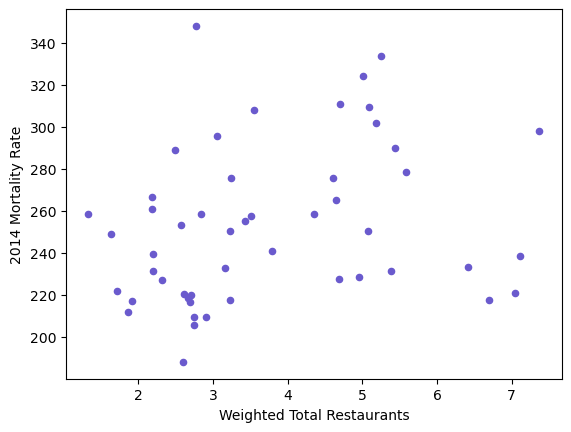

In [20]:
#creating a dataframe for cardiovascular diseases and merging it with population data
cardiovascular_df = mortality_df[mortality_df['Category'] == 'Cardiovascular diseases']
food_mortality_merge = pd.merge(state_pop_merged_df, cardiovascular_df, on='State')

#creating scatter plot
food_mortality_merge.plot(
    kind = 'scatter',
    x = 'Weighted Total Restaurants',
    y = '2014 Mortality Rate',
    color = 'slateblue'
)

#calculating correlation coefficient
corr_cardiovascular = food_mortality_merge['Weighted Total Restaurants'].corr(food_mortality_merge['2014 Mortality Rate'])
print("The correlation coefficient between cardiovascular mortality & \ngeographic location of fast food outlets is", round(corr_cardiovascular,2))


***Neoplasms***

There is a weak correlation between the location of fast food restaurants and neoplasms, with a correlation coefficient of 0.27.

The correlation coefficient between neoplasm mortality & 
geographic location of fast food outlets is 0.27


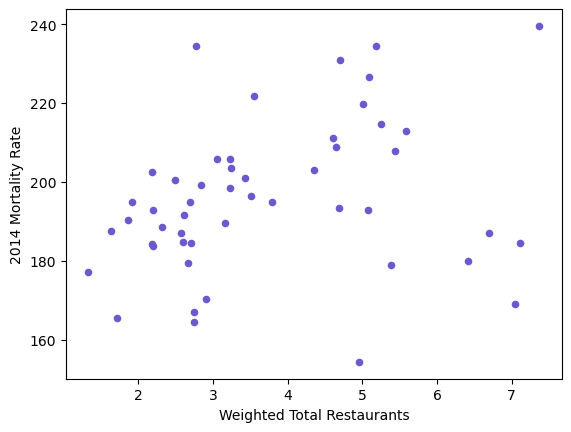

In [21]:
#creating a dataframe for neoplasm deaths and merging it with population
neoplasm_df = mortality_df[mortality_df['Category'] == 'Neoplasms']
food_mortality_merge = pd.merge(state_pop_merged_df, neoplasm_df, on='State')

#creating scatter plot
food_mortality_merge.plot(
    kind = 'scatter',
    x = 'Weighted Total Restaurants',
    y = '2014 Mortality Rate',
    color = 'slateblue'
)

#calculating correlation coefficient
corr_neoplasm = food_mortality_merge['Weighted Total Restaurants'].corr(food_mortality_merge['2014 Mortality Rate'])
print("The correlation coefficient between neoplasm mortality & \ngeographic location of fast food outlets is", round(corr_neoplasm,2))


***Chronic Respiratory Diseases***

There is a moderate correlation between the location of fast food restaurants and chronic respiratory diseases, with a correlation coefficient of 0.57. 

This was an interesting discovery for me as I had made the assumption that respiratory diseases would not be strongly correlated with fast food restaurants. However, upon further research, it seems apparent that asthma is often caused by high consumption of fast foods (Nkosi et al., 2020).

The correlation coefficient between respiratory mortality & 
geographic location of fast food outlets is 0.57


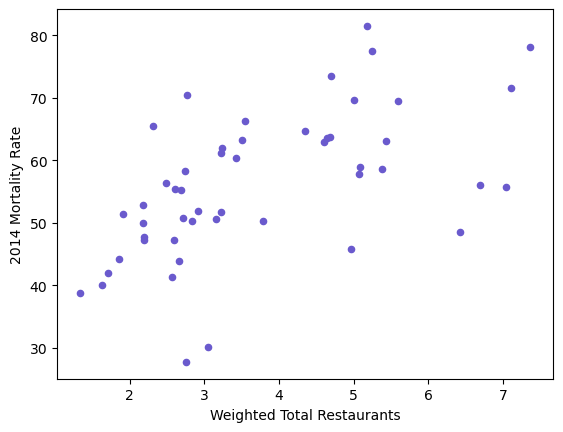

In [22]:
#creating a dataframe for respiratory deaths and merging it with population
respiratory_df = mortality_df[mortality_df['Category'] == 'Chronic respiratory diseases']
food_mortality_merge = pd.merge(state_pop_merged_df, respiratory_df, on='State')

#creating scatter plot
food_mortality_merge.plot(
    kind = 'scatter',
    x = 'Weighted Total Restaurants',
    y = '2014 Mortality Rate',
    color = 'slateblue'
)

#calculating correlation coefficient
corr_respiratory = food_mortality_merge['Weighted Total Restaurants'].corr(food_mortality_merge['2014 Mortality Rate'])
print("The correlation coefficient between respiratory mortality & \ngeographic location of fast food outlets is", round(corr_respiratory,2))


***Neurological Disorders***

There is a weak correlation between the location of fast food restaurants and neurological disorders, with a correlation coefficient of 0.24.

The correlation coefficient between neurological mortality & 
geographic location of fast food outlets is 0.24


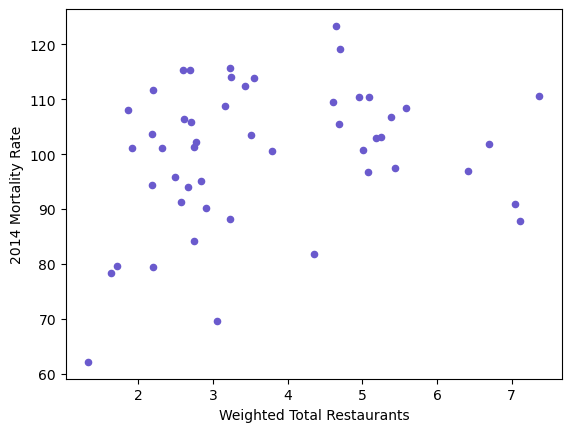

In [23]:
#creating a dataframe for neurological deaths and merging it with population
neurological_df = mortality_df[mortality_df['Category'] == 'Neurological disorders']
food_mortality_merge = pd.merge(state_pop_merged_df, neurological_df, on='State')

#creating scatter plot
food_mortality_merge.plot(
    kind = 'scatter',
    x = 'Weighted Total Restaurants',
    y = '2014 Mortality Rate',
    color = 'slateblue'
)

#calculating correlation coefficient
corr_neurological = food_mortality_merge['Weighted Total Restaurants'].corr(food_mortality_merge['2014 Mortality Rate'])
print("The correlation coefficient between neurological mortality & \ngeographic location of fast food outlets is", round(corr_neurological,2))


***Diabetes, Urogenital, Blood, and Endocrine diseases***

There is a weak correlation between the location of fast food restaurants and diabetes, urogenital, blood and endocrine diseases, with a correlation coefficient of 0.39. Similar to cardiovascular diseases, this was a surprising find for me given that diabetes was another common disease caused by fast food (healthdirect, 2021). 

The correlation coefficient between diabetic mortality 
& geographic location of fast food outlets is 0.39


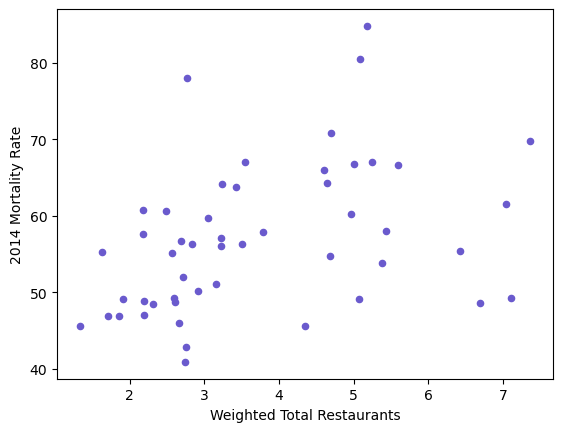

In [24]:
#creating a dataframe for diabetic deaths and merging it with population
diabetes_df = mortality_df[mortality_df['Category'] == 'Diabetes, urogenital, blood, and endocrine diseases']
food_mortality_merge = pd.merge(state_pop_merged_df, diabetes_df, on='State')

#creating scatter plot
food_mortality_merge.plot(
    kind = 'scatter',
    x = 'Weighted Total Restaurants',
    y = '2014 Mortality Rate',
    color = 'slateblue'
)

#calculating correlation coefficient
corr_diabetes = food_mortality_merge['Weighted Total Restaurants'].corr(food_mortality_merge['2014 Mortality Rate'])
print("The correlation coefficient between diabetic mortality \n& geographic location of fast food outlets is", round(corr_diabetes,2))


**Overall Summary**

From the findings above, it is clear that the relationship between mortality and the geographic location of fast food restaurants is generally on the weaker side although respiratory related mortality fell in the moderate category, veering towards the strong side. 

However, the findings did challenge my preconceived assumptions around the geographic locations of fast food restaurants and deaths such as the fact that there is a much weaker relationship with cardiovascular related deaths than expected.

### **D.2 Which mortality type has the strongest correlation with fast food locations?**

Continued from the findings in the graphs and analysis above, respiratory related deaths had the strongest correlation with the geographic locations of fast food restaurants, albeit still only a moderate correlation with a correlation coefficient of 0.57.

### **E. Does the State with the highest mortality rate in the mortality type from Question D.2 also have the highest number of fast food restaurants per capita/100,000 people?**

In question D.2, we identified that respiratory diseases had the strongest correlation with the location of fast food restaurants. Earlier, we had explored the relationships from a correlation perspective. This question now allows us to explore this from a visual State-by-State perspective.

A choropleth chart is used to allow us to easily visualise this. We will be using this visual plot to explore if the States with the highest and lowest respiratory rates also correspond with having the highest/lowest fast food restaurants per 100,000 people.



In [25]:
#reference for creating choropleth plot (My Data Talk, 2023)
#create choropleth plot for respiratory diseases in each State
fig1 = px.choropleth(respiratory_df,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='2014 Mortality Rate',
                    color_continuous_scale="RdBu_r",
                    range_color=(respiratory_df['2014 Mortality Rate'].min(), respiratory_df['2014 Mortality Rate'].max()),                    
                    title = "Respiratory Disease Deaths by State"
                    )
fig1.show()

#create choropleth plot for total number of fast food restaurants per 100,000 people in each state
fig2 = px.choropleth(state_pop_merged_df,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Weighted Total Restaurants',
                    color_continuous_scale="RdBu_r",
                    range_color=(state_pop_merged_df['Weighted Total Restaurants'].min(),state_pop_merged_df['Weighted Total Restaurants'].max()),                    
                    title = "Total Number of Fast Food Restaurants Per Capita"
                    )
fig2.show()



/usr/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)



**Answer**

With outliers removed, the State with the highest respiratory deaths is WV (West Virginia), whereas the State with the most fast food restaurants per 100,000 people is Kentucky. This means no, the State with the highest respiratory mortality rate does not have the most fast food restaurants per 100,000 people.

However, further exploring the analysis, some patterns can definitely be seen. Looking at the respiratory deaths by State there are 7 States which are darkest red in colour - WV (West Virginia), KY (Kentucky), OK (Oklahoma), WY (Wyoming), AL (Alabama), IN (Indiana), AR (Arkansas) and MS (Mississippi),  depicting that these States have the highest number of respiratory deaths. 

Now looking at the fast food restaurants per 100,000 people, although there are less dark reds,  it is clear that the States of NM (New Mexico), WY (Wyoming), KY (Kentucky) and VT (Vermont) have the largest number of fast food restaurants per 100,000 people. 

There is definitely some overlap but not super defined, which does accurately reflect the moderate correlation identified in the previous question.

However, what is interesting is that there are some clear patterns of red and blue in both choropleth maps. For example, the 4 States of IA (Iowa), MO (Missouri), AR (Arkansas) and LA (Louisiana) in both choropleth maps have a clear 'light red coloured' pattern. Similarly, there are also patterns of blue such as the one seen for the States of NY (New York), NJ (New Jersey), PA (Pennsylvania) and MD (Maryland).

Although the correlation is moderate, these patterns highlight that there is still some sort of relationship between the location of fast food restaurants and respiratory mortality.


### **F. What are the trends over time for the mortality type discovered in question D.2. Why is this the case?**

We will now look into some trends over time. Given that we have data on the change in mortality over time from 1980-2014, it is useful to explore this as we want to see if mortality rates have decreased when there are less fast food restaurants per 100,000 occupants.

To read the line chart, a positive reading refers to the percentage the mortality rate has increased by, and a negative reading refers to the percentage the mortality rate has decreased by.

This analysis solely focuses on trends in respiratory deaths. 

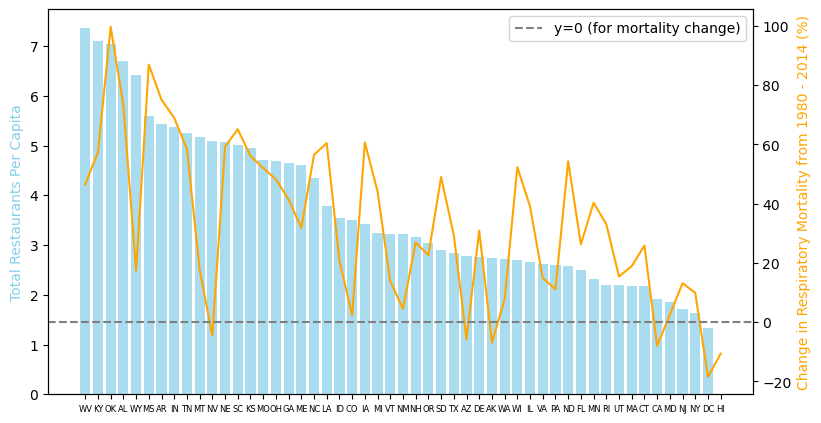

In [26]:
#plotting change in mortality over time with number of restaurants right now
fig = plt.figure(figsize = (20,5))
food_mortality_merge_sorted = food_mortality_merge.sort_values(by='Weighted Total Restaurants', ascending=False)
ax1 = fig.add_subplot(1,2,1)
ax1.bar(food_mortality_merge_sorted['State'], food_mortality_merge_sorted['Weighted Total Restaurants'], color='skyblue', alpha=0.7, label='Total Restaurants Per Capita')
ax1.tick_params(axis='x', labelsize=6)

#adding a second plot onto the same axes
ax2 = ax1.twinx()
ax2.plot(respiratory_df['State'],respiratory_df['Change'], color = 'orange')

#labels
ax2.axhline(y=0, color='grey', linestyle='--', label='y=0 (for mortality change)')
ax2.set_ylabel('Change in Respiratory Mortality from 1980 - 2014 (%)', color = 'orange')
ax1.set_ylabel('Total Restaurants Per Capita', color = 'skyblue')
ax2.legend(loc='upper right')


**Answer**

Although the trend is not entirely consistent, you can see that as a whole, the increase in respiratory deaths from 1980-2014 is much lower when there are less fast food restaurants per 100,000 people, with DC having the 2nd lowest number of restaurants per 100,000 people and having the biggest decrease in respiratory mortality. 

Similarly, OK (Oklahoma) has the 3rd largest number of fast food restaurants per 100,000 people and the highest increase in respiratory mortality from 1980 - 2014.

As a whole, the line chart generally follows a steady decrease as the total number of fast food restaurants also decreases. However it is still important to note that the line chart does not follow a consistent decline, with many highs and lows throughout the plot. This once again reflects the moderate correlation between the two datapoints.

##   **6. Final Thoughts and Comments**

Throughout this project, we explored the most common mortality types in the United States, the States with the most deaths under each of mortality type and the relationship and trends between the location of fast food restaurants and mortality in the United States.

The trends unveiled in Question F, although not entirely linear, demonstrate a general reduction in mortality rates from 1980 to 2014 in States with lower numbers of fast food restaurants.

What I found most interesting was that the death trends in the stereotypical 'health-conscious' States such as New York, Hawaii and California (Johnson, 2023) versus those positioned as stereotypically 'unhealthy' such as Louisiana, Alabama, West Virginia and Kentucky (worldpopulationreview, 2022) were as expected. Stereotypical 'health-conscious' States had less deaths than stereotypical 'unhealthy' States. 

Surprisingly, the relationship between fast food restaurant location and mortality was moderately weak. The most pronounced correlation out of the top 5 mortality types was evident in respiratory mortality which had a correlation coefficient of 0.57. This highlights that there may be some sort of relationship between respiratory illnesses and the location of fast food restaurants. This brings out further questions such as - are there also more smokers in the areas with large numbers of fast food restaurants per 100,000 people? Are there more allergens, more air pollution? 

##   **7. References**
Boy Scouts of America (2018) State and territory abbreviations, Boy Scouts of America. Available at: https://www.scouting.org/resources/los/states/ (Accessed: 10 August 2023). 

Butcher, L. (2020) America the unhealthy: Inequality kills, America the Unhealthy: Inequality kills. Available at: https://knowablemagazine.org/article/health-disease/2020/america-unhealthy-inequality-kills (Accessed: 10 August 2023). 

Chamie, J. (2021) America’s unhealthy lifestyles, The Hill. Available at: https://thehill.com/opinion/finance/559501-americas-unhealthy-lifestyles/ (Accessed: 10 August 2023). 

flyingmeatball (2016) Pandas dataframe str.contains() and Operation, Stack Overflow. Available at: https://stackoverflow.com/questions/37011734/pandas-dataframe-str-contains-and-operation (Accessed: 09 August 2023). 

healthdirect (2021) Junk food and your health, healthdirect. Available at: https://www.healthdirect.gov.au/junk-food-and-your-health (Accessed: 12 August 2023). 

Johnson, S.R. (2023) 10 healthiest states in the U.S., 10 States With the Healthiest Populations. Available at: https://www.usnews.com/news/best-states/slideshows/10-healthiest-states-in-the-us (Accessed: 14 August 2023). 

LaMorte, W.W. (2021) The Correlation Coefficient (r). Available at: https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module9-Correlation-Regression/PH717-Module9-Correlation-Regression4.html (Accessed: 12 August 2023). 

My Data Talk (2023) Simplest way of creating a choropleth map by U.S. states in python, Medium. Available at: https://towardsdatascience.com/simplest-way-of-creating-a-choropleth-map-by-u-s-states-in-python-f359ada7735e (Accessed: 09 August 2023). 

Nkosi, V., Rathogwa-Takalani, F. and Voyi, K. (2020) The frequency of fast food consumption in relation to wheeze and asthma among adolescents in Gauteng and North West Provinces, South Africa, International journal of environmental research and public health. Available at: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7143251/ (Accessed: 14 August 2023). 

tanemaki and Bao, F. (2023) Detect and exclude outliers in a pandas DataFrame, Stack Overflow. Available at: https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe (Accessed: 14 August 2023). 

USAFacts (2023) US obesity rates have tripled over the last 60 years, USAFacts. Available at: https://usafacts.org/articles/obesity-rate-nearly-triples-united-states-over-last-50-years/#:~:text=According%20to%20nationwide%20surveys%20the,of%20Americans%20are%20currently%20obese (Accessed: 10 August 2023). 

worldpopulationreview (2022) Most Unhealthy States, Most unhealthy states. Available at: https://worldpopulationreview.com/state-rankings/most-unhealthy-states (Accessed: 13 August 2023). 

